In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.grid"] = False
# style.use('fivethirtyeight')
# sns.set(style='whitegrid',color_codes=True)
                 
import os   
    
import numpy as np 
import cv2

In [2]:
import tensorflow as tf

## 1. Image Data ETL 

In [3]:
# lookup = dict()
# reverselookup = dict()
# count = 0
# for j in os.listdir('./leapGestRecog/00/'):
#     if not j.startswith('.'): # If running this code locally, this is to 
#                               # ensure you aren't reading in hidden folders
#         lookup[j] = count
#         reverselookup[count] = j
#         count = count + 1
classes = {'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

### 1.1Image Extraction

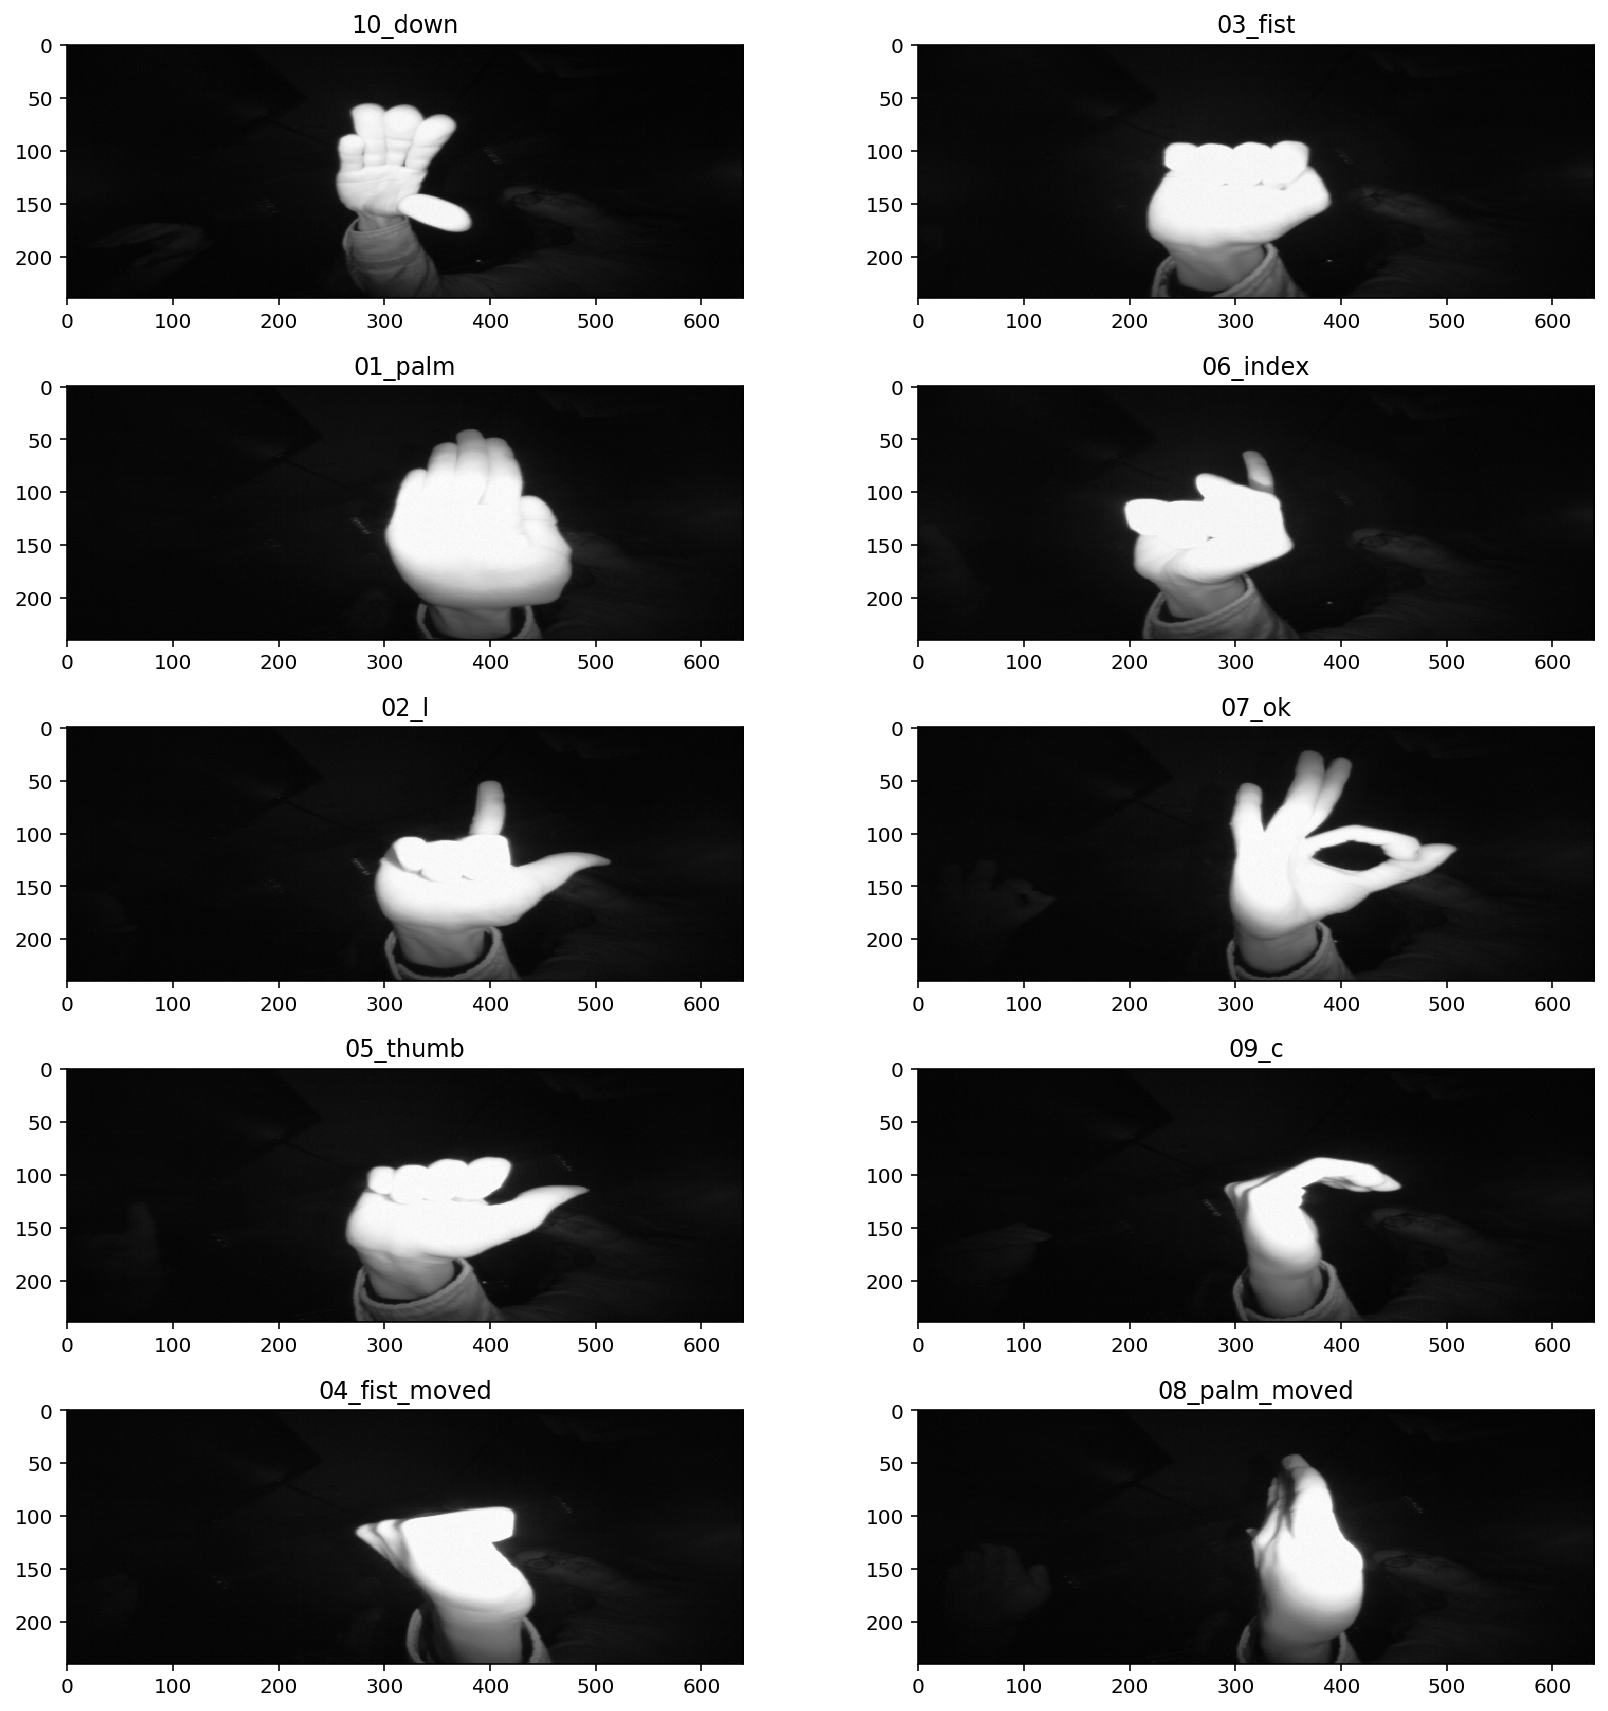

In [4]:
# show all original ten gestures
fig,ax=plt.subplots(5,2)
fig.set_size_inches(12,12)
sys_path = './leapGestRecog/00/'
for i, gesture in enumerate(os.listdir(sys_path)):
    img_title = os.listdir(sys_path + gesture)
    imagepath = os.path.join(sys_path + gesture + '/',img_title[0])
    image = cv2.imread(imagepath)
    ax[i%5,i//5].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i%5,i//5].set_title(gesture)
plt.tight_layout()

In [5]:
x_data = []
y_data = []
IMG_SIZE = 224
datacount = 0 # total count of images are in 
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('./leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # avoid hidden folders
            count = 0 # Total images of a given gesture
            for k in os.listdir('./leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                path = './leapGestRecog/0' + str(i) + '/' + j + '/' + k
                img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), classes[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)

NameError: name 'save' is not defined

In [9]:
# np.save('x_data.npy', x_data)
# np.save('y_data.npy', y_data)

In [11]:
x_data = np.load('x_data.npy')
y_data = np.load('y_data.npy')

(20000, 224, 224, 1)

In [18]:
# x_data = np.squeeze(x_data)
x_data.shape

(20000, 224, 224)

In [12]:
y_data.shape

(100, 200, 1)

In [15]:
y_data = y_data.reshape(x_data.shape[0],)
y_data.shape

(20000,)

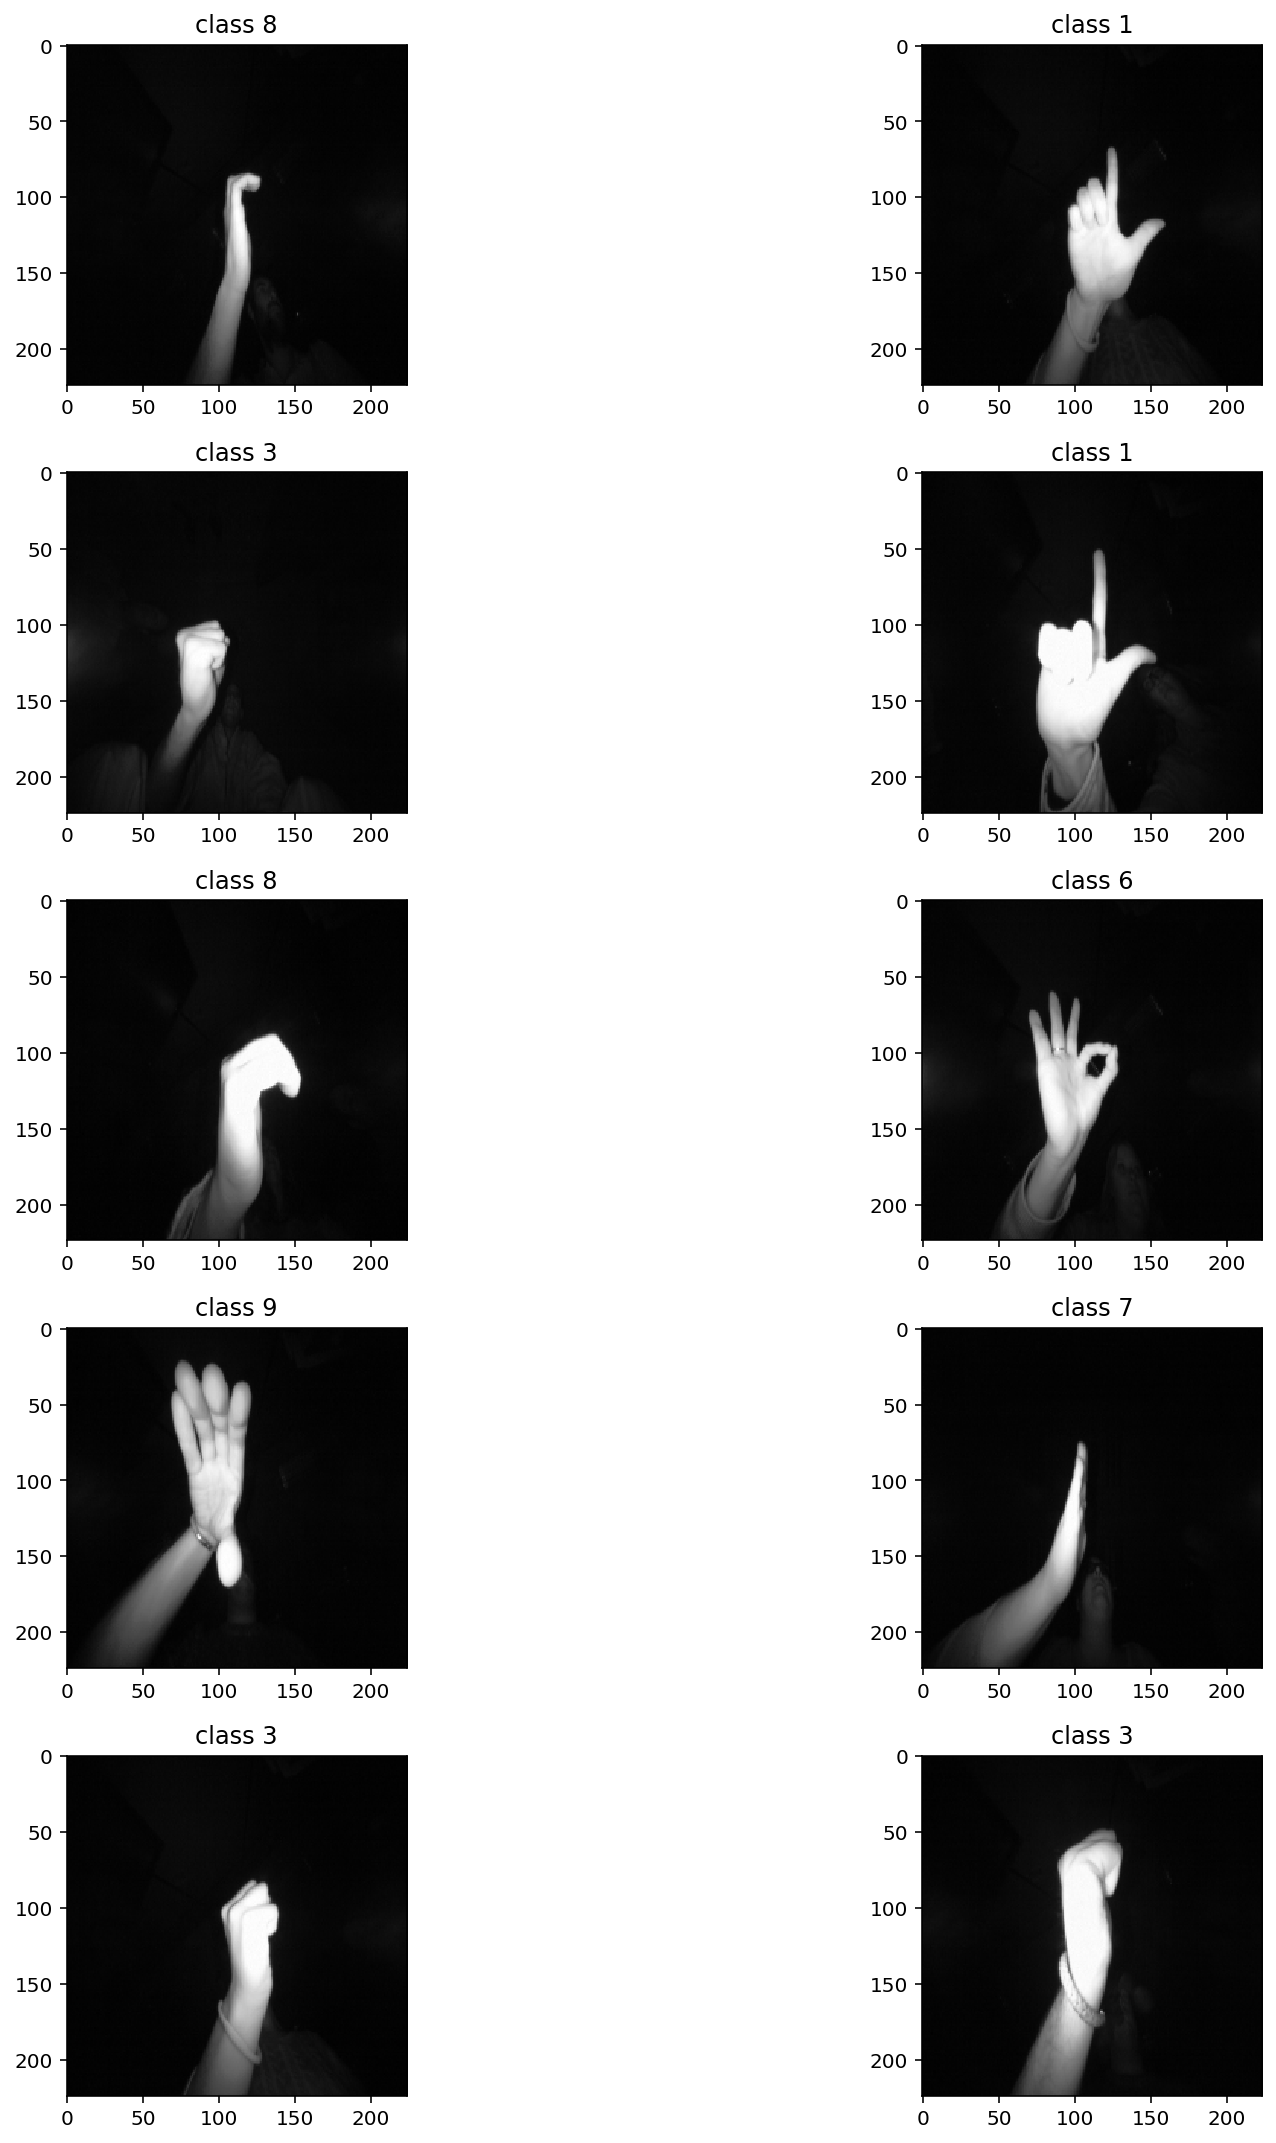

In [19]:
import random
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(y_data))
        ax[i,j].imshow(x_data[l],cmap='gray')
        ax[i,j].set_title('class '+ str(y_data[l]))
        
plt.tight_layout()

### 1.2 Random Data Augmentation

In [20]:
from keras.preprocessing.image import ImageDataGenerator
import random

Using TensorFlow backend.


In [21]:
aug = [ImageDataGenerator(rotation_range=random.randrange(180)),
       ImageDataGenerator(horizontal_flip=True),
       ImageDataGenerator(zoom_range=[0.5, 1.5]),
       ImageDataGenerator(width_shift_range=0.2)]

In [23]:
# randomly generate a new image for each image
new_img = []
new_label = []
x_data = x_data.reshape(*x_data.shape,1)
for i, img in enumerate(x_data):
    img = np.expand_dims(img, 0)
    datagen = aug[random.randrange(len(aug))] # ramdomly pick a transform
    it = datagen.flow(img, batch_size=1) # generator
    new = it.next()[0].astype('float32')
    new_img.append(new)
    new_label.append(y_data[i])
new_imgs = np.array(new_img)
new_labels = np.array(new_label)

In [24]:
new_imgs.shape

(20000, 224, 224, 1)

In [25]:
new_labels.shape

(20000,)

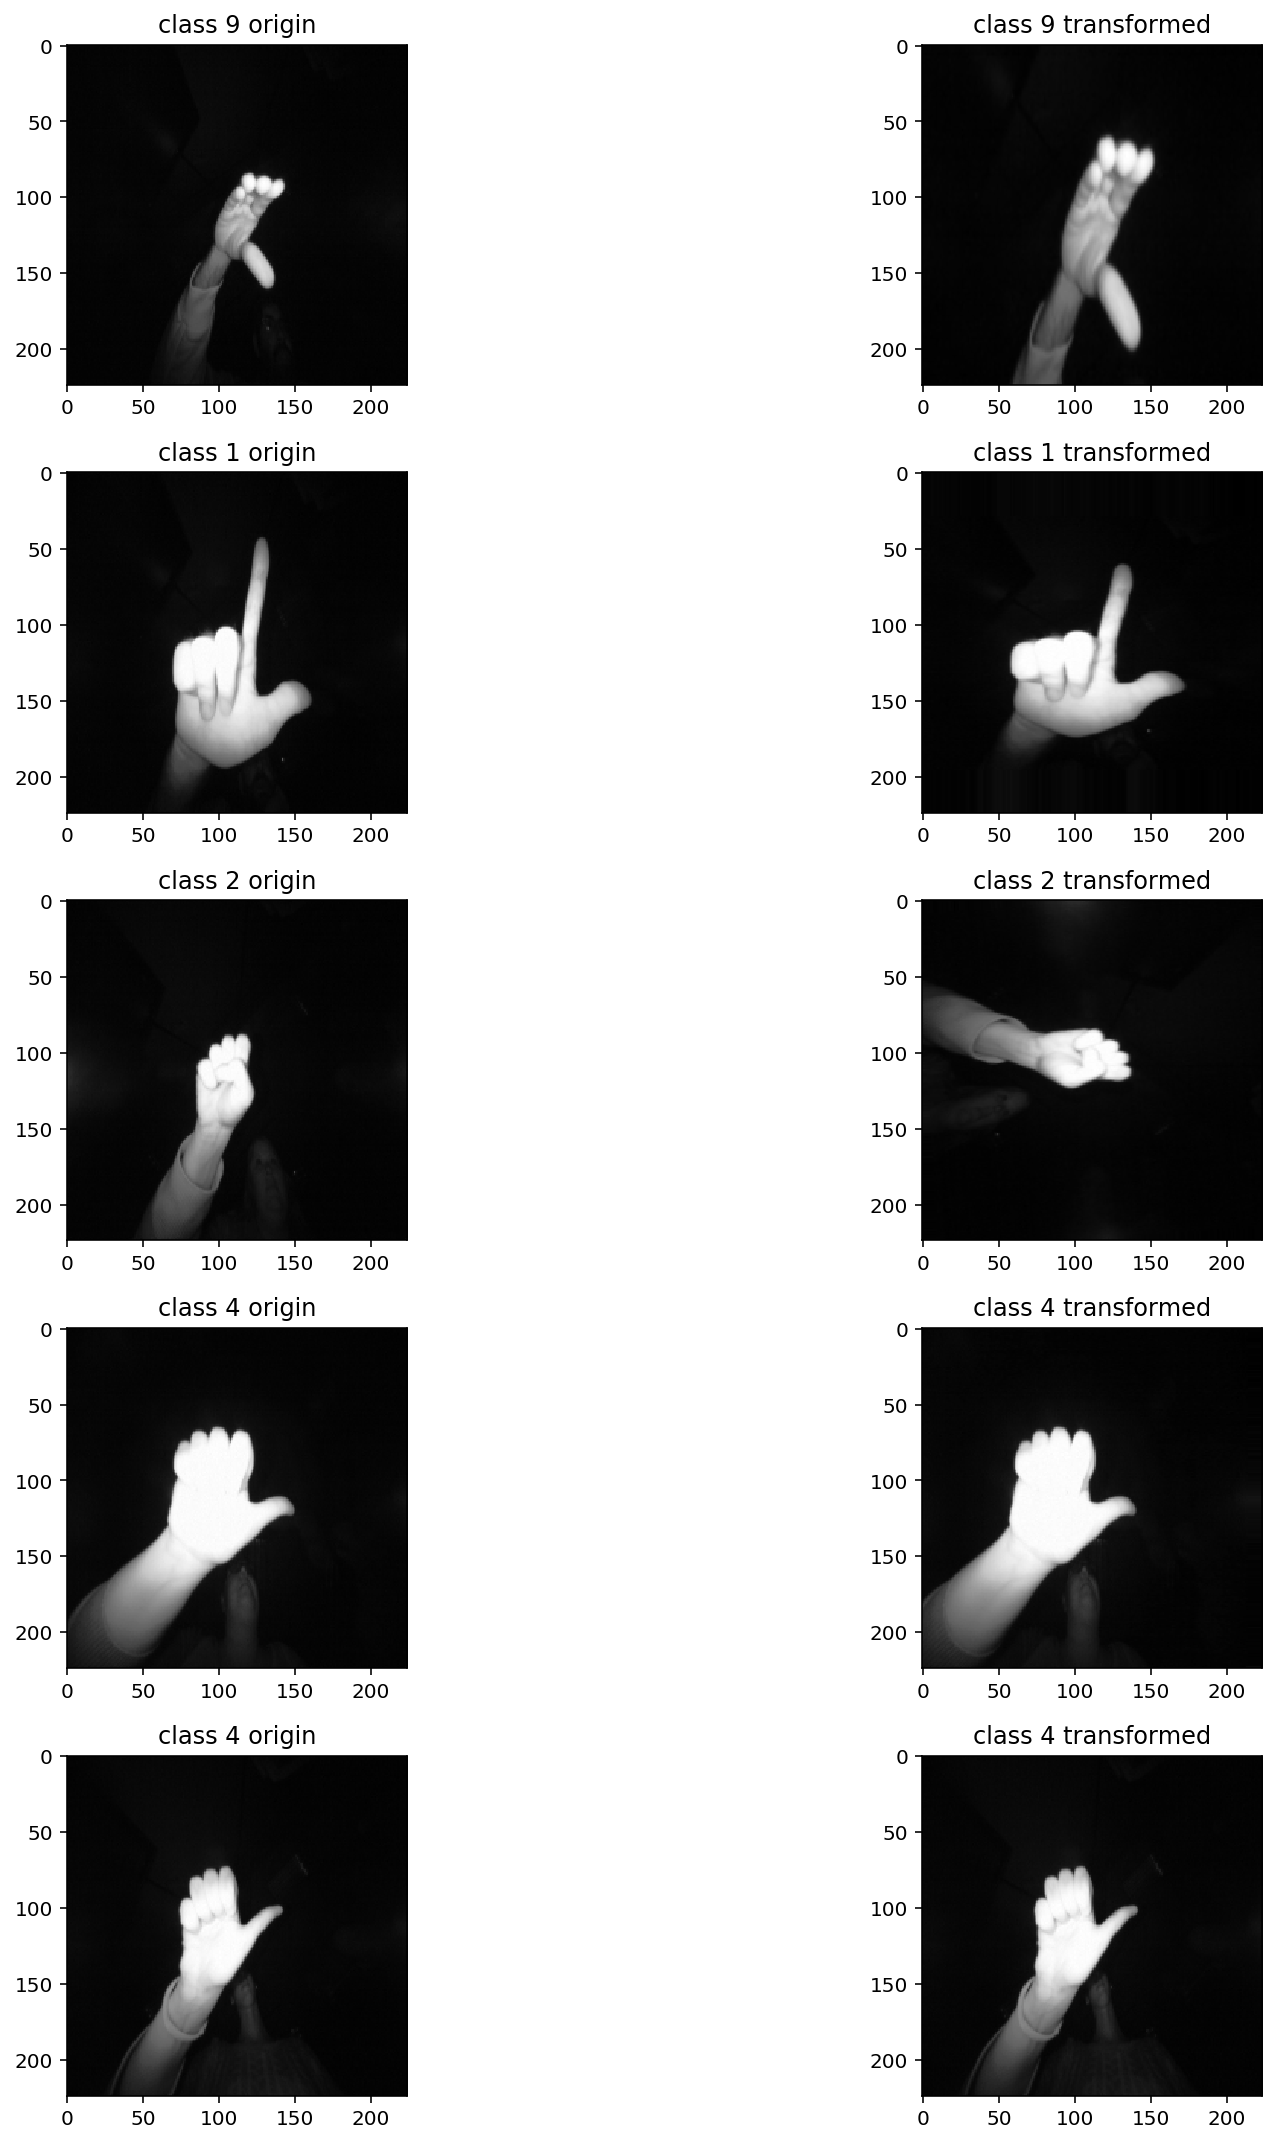

In [27]:
# Visualize several transformed images with its origin
x_data = np.squeeze(x_data)
new_imgs = np.squeeze(new_imgs)
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    l=random.randint(0,len(new_labels))
    ax[i,0].imshow(x_data[l],cmap='gray')
    ax[i,0].set_title('class '+ str(y_data[l]) + ' origin')
    ax[i,1].imshow(new_imgs[l],cmap='gray')
    ax[i,1].set_title('class '+ str(y_data[l]) + ' transformed')
plt.tight_layout()

In [ ]:
x_total = np.concatenate((x_data, new_imgs), axis=0)
y_total = np.concatenate((y_data, new_labels), axis=0)

In [ ]:
x_total.shape

In [ ]:
y_total.shape

### Normalize and shuffle